<a href="https://colab.research.google.com/github/tec03/ParaAssignment01-/blob/main/assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Juan Pablo Bladinieres Martin del Campo A01793474


In [ ]:
# Get Data and create csv to work localy
import requests
import os
import pandas as pd
import numpy as np

url='https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
path=os.path.join(os.getcwd(),'cars.csv')

df=pd.read_csv(url, header= None)
headers=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
df.columns = headers
df.to_csv(path)

In [ ]:
import pandas as pd
import numpy as np

# Read from local file
#path="./cars.csv"
#df=pd.read_csv(path)

# Read online
url='https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
df=pd.read_csv(url, header= None)
headers=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
df.columns = headers
df=df.replace('?',np.NaN)
df2=df.copy()

# Access values by column
print(df2["symboling"].head(3))

# Add 1 to whole columns
df2["symboling"]=df2["symboling"]+1
print(df2["symboling"].head(3))

Missing Data
Options:
1. Request to get the missing value.
2. Drop missing values. (not recommended when limited data).
    - Drop entry
    - Drop variable
3. Replace missing values (less accurate)
    - Replace with average (not categorical)
    - Replace with median (categorical)
    - Replace with other functions
4. Leave missing Data


In [ ]:
# Missing Data
df3=df.copy()

# 1 Drop data
print(df3.head(1))
df3.dropna( subset=["price"], axis=0, inplace=True) 
# subset = column/row
# axis = 1 = column or axis = 0 = rows
# inplace = True use same dataframe or False set to a new dataframe

print(df3.dropna().head(1))

In [ ]:
# 2 Replace
df4=df.copy()

print(df4.head(1))

# Replace with mean
# Get Mean
mean=df4["normalized-losses"].astype(float).mean()
print(mean)

# Replace
df4["normalized-losses"].replace( np.NaN, mean, inplace=True) 
# First value What to replace
# Second value Replace to ...

print(df4.head(1))

In [ ]:
# Data formatting

# By function
df["city-"] = 235/df["city-mpg"]

# Rename any column or row
df.rename(columns={"city-":"city-L/100km"}, inplace=True)
df

In [ ]:
# Incorrect data types

# Identify data types
print(df.dtypes)

# Adjust types by column
df["price"] = df["price"].astype("float")
df["normalized-losses"] = df["normalized-losses"].astype("float")
df["make"] = df["make"].astype("string")
df["fuel-type"] = df["fuel-type"].astype("string")
df["aspiration"] = df["aspiration"].astype("string")
df["num-of-doors"] = df["num-of-doors"].astype("string")
df["body-style"] = df["body-style"].astype("string")
df["drive-wheels"] = df["drive-wheels"].astype("string")
df["engine-location"] = df["engine-location"].astype("string")
df["engine-type"] = df["engine-type"].astype("string")
df["fuel-system"] = df["fuel-system"].astype("string")
df["num-of-cylinders"] = df["num-of-cylinders"].astype("string")
df["bore"] = df["bore"].astype("float")
df["stroke"] = df["stroke"].astype("float")
df["horsepower"] = df["horsepower"].astype("float")
df["peak-rpm"] = df["peak-rpm"].astype("float")
print(df.dtypes)

In [ ]:
# Data normalization

# Arrange the range of values to ajust importance
df5=df.copy()

# Simple Feature Scaling ( Xnew = Xold / Xmax )
df5["length-SFS"]=df["length"]/df["length"].max()

# Min-Max ( Xnew = (Xold - Xmin) / (Xmax - Xmin ))
df5["length-MM"]=(df["length"]-df["length"].min())/(df["length"].max()-df["length"].min())

# Z-score ( Xnew = (Xold - mean of feature ) / standar deviation )
df5["length-Z"]=(df["length"]-df["length"].mean())/df["length"].std()


print(df5[["length","length-SFS","length-MM","length-Z"]].head(3))


,price,price-binned
0,13495.0,Low
1,16500.0,Low
2,16500.0,Low
3,13950.0,Low
4,17450.0,Low
...,...,...
200,16845.0,Low
201,19045.0,Medium
202,21485.0,Medium
203,22470.0,Medium


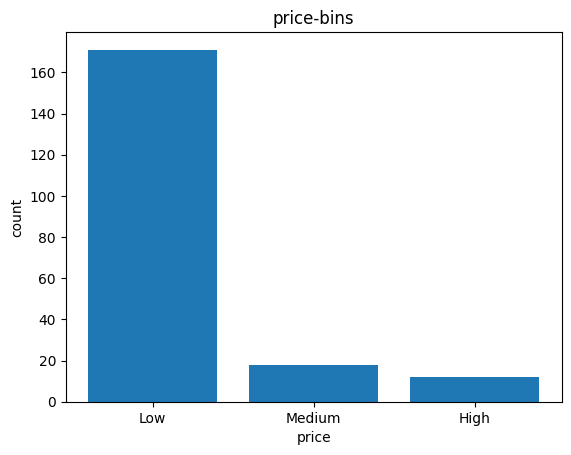

In [97]:
# Binning
import matplotlib as plt
from matplotlib import pyplot

# Group values in Bins 
# Can be for categorical or non categorical
df6=df.copy()

# Bin

# Separate into 3 categories the min and max values of a column
bins = np.linspace(min(df["price"]),max(df["price"]),4)

# Create the Names of the categories
group_names = ["Low","Medium","High"]

# Separete de column into categories using cut
df["price-binned"]=pd.cut(df["price"],bins,labels=group_names, include_lowest=True)

pyplot.bar(group_names, df["price-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("price")
plt.pyplot.ylabel("count")
plt.pyplot.title("price-bins")

df[["price","price-binned"]]

In [92]:
# Use categorical values
# One hot Encoding
pd.get_dummies(df["fuel-type"])


,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [95]:
# Aditional

# Get if data is missing
missing_data = df.isnull()
print(missing_data.head(2))

# Get missing count
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    




   symboling  normalized-losses   make  fuel-type  aspiration  num-of-doors  \
0      False               True  False      False       False         False   
1      False               True  False      False       False         False   

   body-style  drive-wheels  engine-location  wheel-base  ...   bore  stroke  \
0       False         False            False       False  ...  False   False   
1       False         False            False       False  ...  False   False   

   compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg  price  \
0              False       False     False     False        False  False   
1              False       False     False     False        False  False   

   city-L/100km  price-binned  
0         False         False  
1         False         False  

[2 rows x 28 columns]
symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype:

Progress
See image

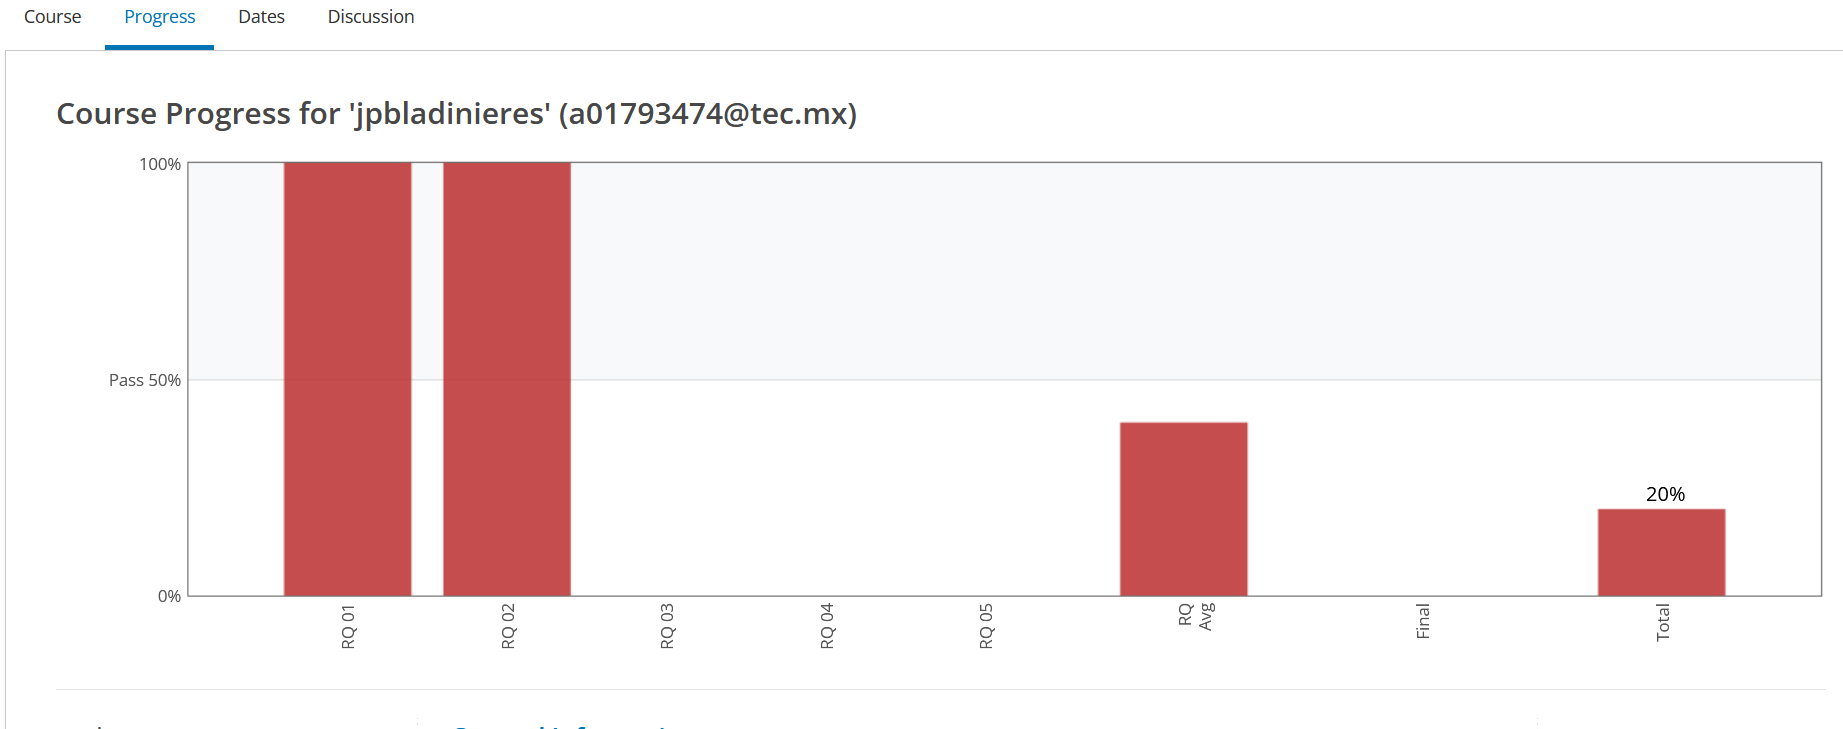

In [99]:
import os 
from PIL import Image

imgpath="./progreso2DA0101EN.png"
Image.open(imgpath)  